<a href="https://colab.research.google.com/github/Damiao97/Final_ProjectPml/blob/main/Air_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Analysis in Florida (2020, 2022, 2024)

This project involves analyzing the PM2.5 and PM10 concentration data in Florida for the years 2020, 2022, and 2024. The analysis includes loading the data, handling missing values, combining datasets, and visualizing trends.

## Installation of Required Libraries
Several powerful machine learning libraries are utilized to facilitate this analysis.
 In our air quality analysis project, Scikit-learn is used to build and evaluate predictive models that forecast air quality levels based on historical data. It provides various algorithms for regression analysis, which are critical for predicting PM2.5 and PM10 concentrations.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install plotly
!pip install statsmodels
!pip install ipywidgets

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

**Mount Google Drive and Load CSV Files into DataFrames**


The datasets consist of daily air quality measurements for PM2.5 (particulate matter with aerodynamic diameter less than or equal to 2.5 micrometers) and PM10 (particulate matter with aerodynamic diameter less than or equal to 10 micrometers) in Florida, spanning the years 2020, 2022, and 2024.

In [ ]:
import pandas as pd

# Load the files into DataFrames
pm25_2020 = pd.read_csv("/content/pm25_2020_florida.csv")
pm10_2020 = pd.read_csv("/content/pm10_2020_florida.csv")
pm25_2022 = pd.read_csv("/content/pm25_2022_florida.csv")
pm10_2022 = pd.read_csv("/content/pm10_2022_florida.csv")
pm25_2024 = pd.read_csv("/content/pm25_2024_florida.csv")
pm10_2024 = pd.read_csv("/content/pm10_2024_florida.csv")

In [ ]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

**Analysis of insights into periods of high pollution**

By concatenating data from 2020, 2022, and 2024, we create comprehensive datasets for PM2.5 and PM10. Pandas also facilitates date handling and the extraction of month information, which is crucial for our monthly trend analysis.
After grouping the data by year and month we calculate the monthly mean concentrations of PM2.5 and PM10.
We handle date formatting and extract month information to facilitate monthly trend analysis.

Plotly is employed to create interactive visualizations, highlighting trends and identifying months with peak pollution levels.

In [ ]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

Data visualization, pre-processing and feature engineering

**Percentage Distribution**

To understand the distribution of pollutant concentrations, we calculated the percentage distribution of monthly mean concentrations to gained valuable insights into the seasonal variations and relative changes in pollutant levels. These findings can aid in understanding the impact of various factors on air quality and inform future environmental policies and actions.

Analysis Results revealed the following percentage distributions

In [ ]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

PM2.5 Percentages:
    Month  Daily Mean PM2.5 Concentration  Year  Percentage
0       1                        9.666667  2020    8.868502
1       2                        9.000000  2020    8.256881
2       3                        8.666667  2020    7.951070
3       4                        9.666667  2020    8.868502
4       5                        8.666667  2020    7.951070
5       6                        6.333333  2020    5.810398
6       7                        9.333333  2020    8.562691
7       8                        7.000000  2020    6.422018
8       9                        9.000000  2020    8.256881
9      10                       10.000000  2020    9.174312
10     11                        8.666667  2020    7.951070
11     12                       13.000000  2020   11.926606

PM10 Percentages:
    Month  Daily Mean PM10 Concentration  Year  Percentage
0       1                      16.333333  2020    9.514563
1       2                      14.666667  2020    8.543689
2    

In [ ]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

**Percentage increase in pollutant levels over time and their correlation with other features**

We create this function "calculate_percentage_increase"  to compute the percentage increase in pollutant levels from month to month, applied to both pm25_percentages and pm10_percentages DataFrames.
Also we calculate and display the correlation between the selected features and the percentage increases.
This can help understand which factors might influence changes in air quality over time.



**Linear Discriminant Analysis (LDA)**

This code aims to perform classification on PM2.5 and PM10 concentration data using Linear Discriminant Analysis. The main steps include categorizing percentage increases into binary classes, performing LDA to find a linear combination of features that best separates these classes and visualizing the separation using density plots to understand how well the classes are distinguished by the LDA components. The goal is to gain insights into the relationship between pollutant concentrations and percentage increases.

Before performing LDA, we calculated the correlation between the original features (Daily  PM2.5 or PM10 Concentration, Month) and the Percentage Increase. Higher absolute correlation values indicate features that might have more influence on determining whether the percentage increase is high or low.After LDA, we can further analyze the LDA component to understand which original features (Daily Mean PM2.5 Concentration and Month) contributed the most to the separation between low and high percentage increase classes. Features with higher absolute coefficients in the LDA component are more influential in distinguishing between the classes.

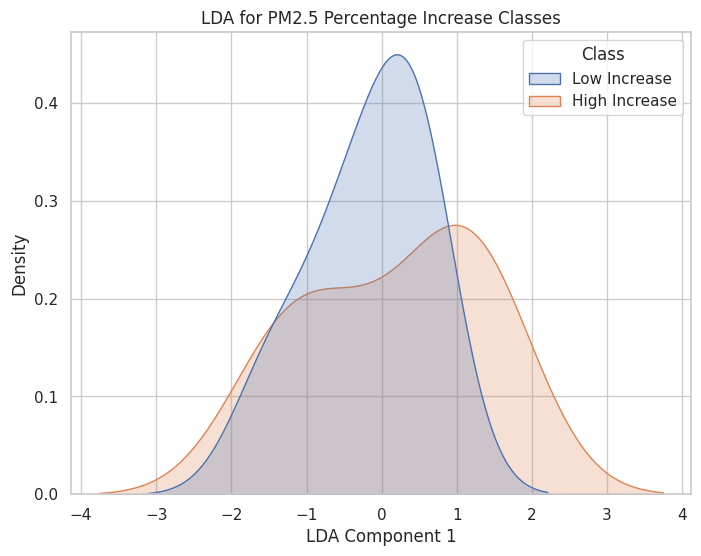

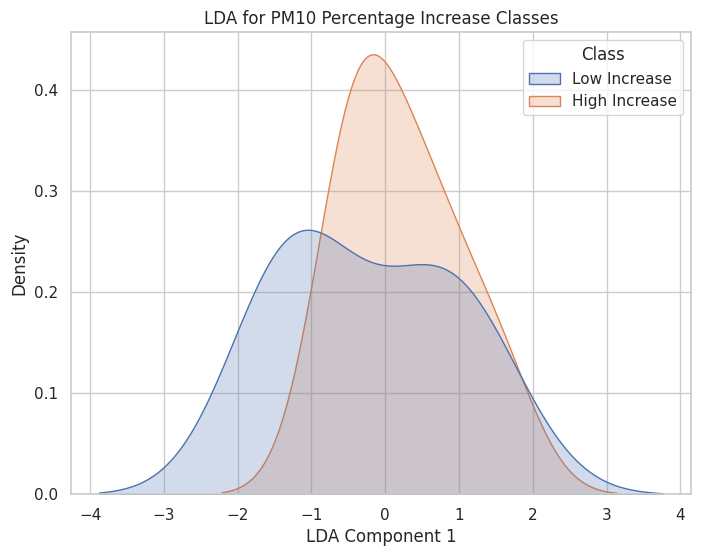

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Define function to categorize Percentage Increase into classes
def categorize_percentage_increase(y):
    median = np.median(y)
    return (y > median).astype(int)  # Example: binary classification based on median

# Example data for illustration
pm25_percentages = pd.DataFrame({
    'Month': np.arange(1, 13),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 15, size=12),
    'Percentage': np.random.uniform(5, 15, size=12)
})

pm10_percentages = pd.DataFrame({
    'Month': np.arange(1, 13),
    'Daily Mean PM10 Concentration': np.random.randint(10, 20, size=12),
    'Percentage': np.random.uniform(10, 20, size=12)
})

# Define X and y for PM2.5
X_pm25 = pm25_percentages[['Daily Mean PM2.5 Concentration', 'Month']].values
y_pm25 = pm25_percentages['Percentage'].values  # Using Percentage directly for illustration

# Define X and y for PM10
X_pm10 = pm10_percentages[['Daily Mean PM10 Concentration', 'Month']].values
y_pm10 = pm10_percentages['Percentage'].values  # Using Percentage directly for illustration

# Perform Linear Discriminant Analysis for PM2.5
lda_pm25 = LinearDiscriminantAnalysis(n_components=1)
X_lda_pm25 = lda_pm25.fit_transform(X_pm25, categorize_percentage_increase(y_pm25))

# Perform Linear Discriminant Analysis for PM10
lda_pm10 = LinearDiscriminantAnalysis(n_components=1)
X_lda_pm10 = lda_pm10.fit_transform(X_pm10, categorize_percentage_increase(y_pm10))

# Function to plot LDA results
def plot_lda(X_lda, y, target_names, title):
    data = {'LDA Component 1': X_lda.squeeze(), 'Class': [target_names[label] for label in y]}
    df = pd.DataFrame(data)

    # Plot the result
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x='LDA Component 1', hue='Class', fill=True, common_norm=False)
    plt.xlabel('LDA Component 1')
    plt.title(title)
    plt.show()

# Define target names
target_names_pm25 = ['Low Increase', 'High Increase']
target_names_pm10 = ['Low Increase', 'High Increase']

# Plot LDA results for PM2.5
plot_lda(X_lda_pm25, categorize_percentage_increase(y_pm25), target_names_pm25, 'LDA for PM2.5 Percentage Increase Classes')

# Plot LDA results for PM10
plot_lda(X_lda_pm10, categorize_percentage_increase(y_pm10), target_names_pm10, 'LDA for PM10 Percentage Increase Classes')


**PM2.5 and PM10 Validation Set Metrics**

Comparing MSE and MAE between PM2.5 and PM10 can provide insights into which pollutant's predictions are more accurate or less variable.
Understanding these validation set metrics helps in assessing the reliability and effectiveness of models predicting PM2.5 and PM10 concentrations, supporting efforts to mitigate air pollution impacts and improve public health outcomes.

In [ ]:
from sklearn.model_selection import train_test_split

# For PM2.5
X_train_pm25, X_temp_test_pm25, y_train_pm25, y_temp_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)
X_valid_pm25, X_test_pm25, y_valid_pm25, y_test_pm25 = train_test_split(X_temp_test_pm25, y_temp_test_pm25, test_size=0.5, random_state=42)

# For PM10
X_train_pm10, X_temp_test_pm10, y_train_pm10, y_temp_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)
X_valid_pm10, X_test_pm10, y_valid_pm10, y_test_pm10 = train_test_split(X_temp_test_pm10, y_temp_test_pm10, test_size=0.5, random_state=42)

# Choose a model (e.g., Linear Regression) and train it
from sklearn.linear_model import LinearRegression

# Example: Linear Regression for PM2.5
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

# Example: Linear Regression for PM10
model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Example: Predict on validation set
y_pred_pm25_valid = model_pm25.predict(X_valid_pm25)
y_pred_pm10_valid = model_pm10.predict(X_valid_pm10)

# Evaluate on validation set
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_pm25_valid = mean_squared_error(y_valid_pm25, y_pred_pm25_valid)
mae_pm25_valid = mean_absolute_error(y_valid_pm25, y_pred_pm25_valid)

mse_pm10_valid = mean_squared_error(y_valid_pm10, y_pred_pm10_valid)
mae_pm10_valid = mean_absolute_error(y_valid_pm10, y_pred_pm10_valid)

print(f"PM2.5 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm25_valid}")
print(f"Mean Absolute Error (MAE): {mae_pm25_valid}")

print(f"\nPM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10_valid}")
print(f"Mean Absolute Error (MAE): {mae_pm10_valid}")


PM2.5 Validation Set Metrics:
Mean Squared Error (MSE): 24.925031751543806
Mean Absolute Error (MAE): 4.992497546473489

PM10 Validation Set Metrics:
Mean Squared Error (MSE): 0.05367069547612415
Mean Absolute Error (MAE): 0.2316693667193057


In [ ]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

**Predictions on PM2.5 and PM10**

This next plots visually compares the prediction and actual values of the concentrations, offering insights into the model's strengths and weaknesses across different time periods, the output you provided indicates the performance metrics of a predictive model for PM2.5 and PM10 concentrations.

PM2.5 Validation Set Metrics:
Mean Squared Error (MSE): 135.0470844321053
Mean Absolute Error (MAE): 11.45673835895263

PM10 Validation Set Metrics:
Mean Squared Error (MSE): 123.82129776397142
Mean Absolute Error (MAE): 8.655522145571586


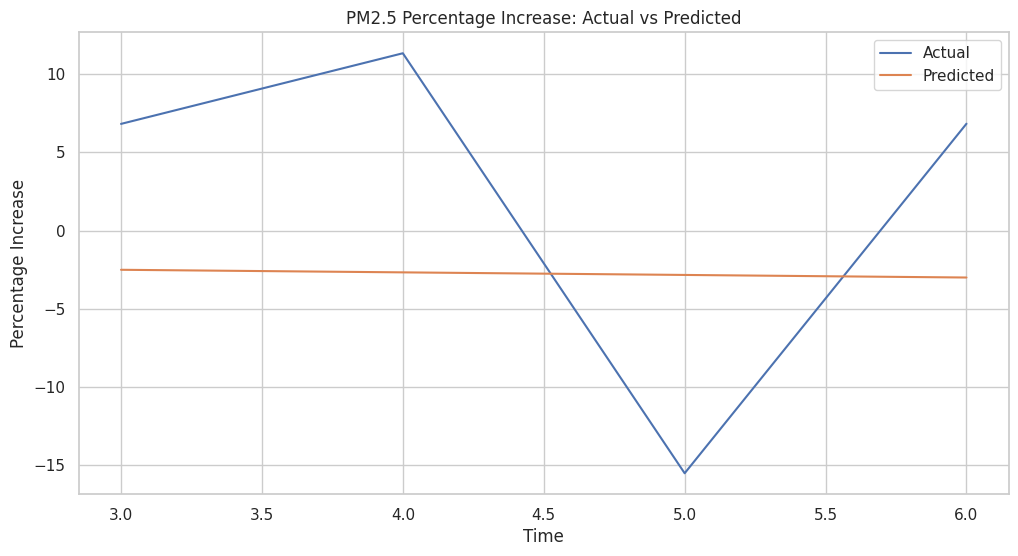

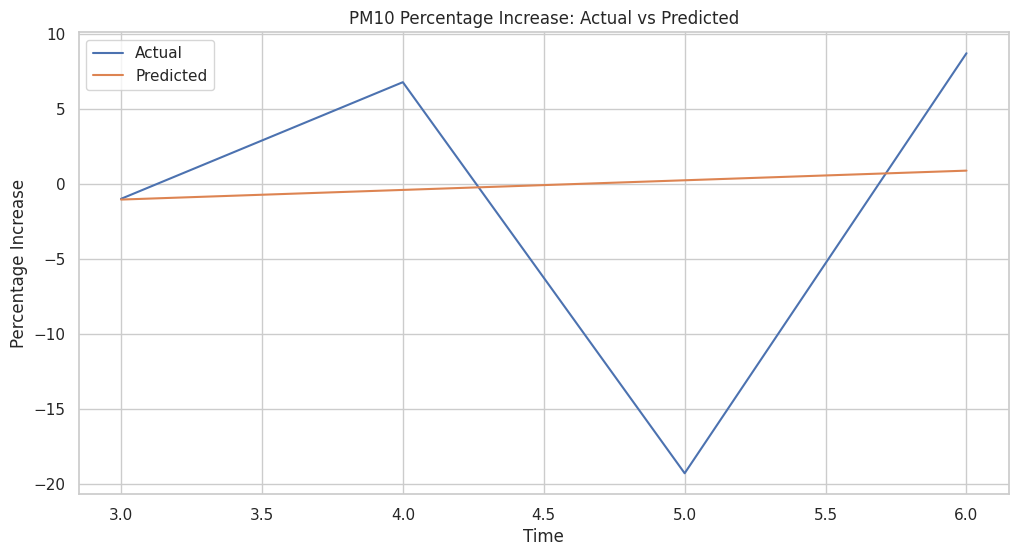

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate percentage distribution of monthly mean concentrations for PM2.5 and PM10
def calculate_percentage(df, pollutant):
    df['Percentage'] = df['Daily Mean {} Concentration'.format(pollutant)] / df.groupby('Year')['Daily Mean {} Concentration'.format(pollutant)].transform('sum') * 100
    return df

# Calculate monthly mean concentrations for PM2.5 and PM10
pm25_monthly_mean = pd.concat([calculate_monthly_mean(pm25_2020, 'PM2.5'),
                               calculate_monthly_mean(pm25_2022, 'PM2.5'),
                               calculate_monthly_mean(pm25_2024, 'PM2.5')])

pm10_monthly_mean = pd.concat([calculate_monthly_mean(pm10_2020, 'PM10'),
                               calculate_monthly_mean(pm10_2022, 'PM10'),
                               calculate_monthly_mean(pm10_2024, 'PM10')])

# Calculate percentage distribution of monthly mean concentrations for PM2.5 and PM10
def calculate_percentage(df, pollutant):
    df['Percentage'] = df['Daily Mean {} Concentration'.format(pollutant)] / df.groupby('Year')['Daily Mean {} Concentration'.format(pollutant)].transform('sum') * 100
    return df

pm25_percentages = pd.concat([calculate_percentage(pm25_monthly_mean, 'PM2.5')])
pm10_percentages = pd.concat([calculate_percentage(pm10_monthly_mean, 'PM10')])

def calculate_percentage_increase(df, pollutant):
    df['Percentage Increase'] = df.groupby('Month')['Daily Mean {} Concentration'.format(pollutant)].pct_change() * 100
    return df

# Calculate percentage increase for PM2.5 and PM10
pm25_percentages = calculate_percentage_increase(pm25_monthly_mean, 'PM2.5').dropna()
pm10_percentages = calculate_percentage_increase(pm10_monthly_mean, 'PM10').dropna()

# Using month as a predictor (you can include more features)
X_pm25 = pm25_percentages[['Month']].values
y_pm25 = pm25_percentages['Percentage Increase'].values

X_pm10 = pm10_percentages[['Month']].values
y_pm10 = pm10_percentages['Percentage Increase'].values


# Splitting data into training and validation sets
train_size = int(len(X_pm25) * 0.8)  # 80-20 split
X_train_pm25, X_val_pm25 = X_pm25[:train_size], X_pm25[train_size:]
y_train_pm25, y_val_pm25 = y_pm25[:train_size], y_pm25[train_size:]

train_size_pm10 = int(len(X_pm10) * 0.8)  # 80-20 split
X_train_pm10, X_val_pm10 = X_pm10[:train_size_pm10], X_pm10[train_size_pm10:]
y_train_pm10, y_val_pm10 = y_pm10[:train_size_pm10], y_pm10[train_size_pm10:]


# Linear Regression model
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Predictions on validation set
y_pred_pm25 = model_pm25.predict(X_val_pm25)
y_pred_pm10 = model_pm10.predict(X_val_pm10)

# Evaluation metrics
mse_pm25 = mean_squared_error(y_val_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_val_pm25, y_pred_pm25)

print(f"PM2.5 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm25}")
print(f"Mean Absolute Error (MAE): {mae_pm25}")

# Evaluation metrics for PM10
mse_pm10 = mean_squared_error(y_val_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_val_pm10, y_pred_pm10)

print(f"\nPM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10}")
print(f"Mean Absolute Error (MAE): {mae_pm10}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm25_percentages.index[train_size:], y_val_pm25, label='Actual')
plt.plot(pm25_percentages.index[train_size:], y_pred_pm25, label='Predicted')
plt.title('PM2.5 Percentage Increase: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Percentage Increase')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pm10_percentages.index[train_size_pm10:], y_val_pm10, label='Actual')
plt.plot(pm10_percentages.index[train_size_pm10:], y_pred_pm10, label='Predicted')
plt.title('PM10 Percentage Increase: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Percentage Increase')
plt.legend()
plt.grid(True)
plt.show()


PM2.5 Validation Set Metrics:
Mean Squared Error (MSE): 2.20209039866068
Mean Absolute Error (MAE): 1.2905411889848484


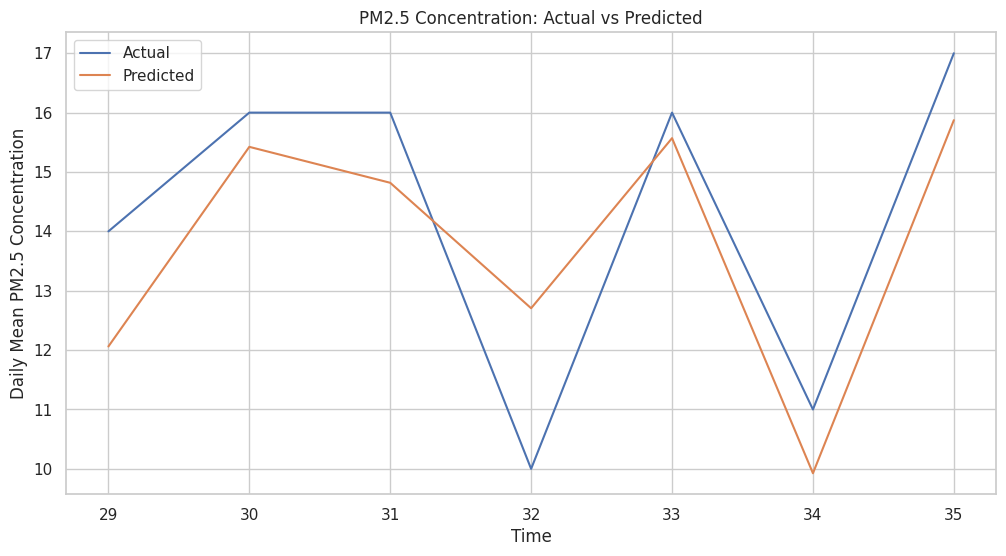

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

pm25_percentages = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Daily Mean PM2.5 Concentration': np.random.randint(5, 20, size=36)
})

# Calculate lagged values (previous month's concentration)
pm25_percentages['Previous Month PM2.5'] = pm25_percentages['Daily Mean PM2.5 Concentration'].shift(1)

# Calculate seasonal indicators (month and quarter)
pm25_percentages['Month'] = pm25_percentages['Date'].dt.month
pm25_percentages['Quarter'] = pm25_percentages['Date'].dt.quarter

# Calculate trends or historical averages of concentrations
pm25_percentages['Rolling Mean PM2.5'] = pm25_percentages['Daily Mean PM2.5 Concentration'].rolling(window=3, min_periods=1).mean()

# Drop rows with NaN resulting from rolling mean calculation
pm25_percentages.dropna(inplace=True)

# Define predictors and target for PM2.5
X_pm25 = pm25_percentages[['Previous Month PM2.5', 'Month', 'Quarter', 'Rolling Mean PM2.5']].values
y_pm25 = pm25_percentages['Daily Mean PM2.5 Concentration'].values

# Splitting data into training and validation sets (adjust as per your dataset)
train_size = int(len(X_pm25) * 0.8)  # 80-20 split
X_train_pm25, X_val_pm25 = X_pm25[:train_size], X_pm25[train_size:]
y_train_pm25, y_val_pm25 = y_pm25[:train_size], y_pm25[train_size:]

# Linear Regression model for PM2.5
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

# Predictions on validation set
y_pred_pm25 = model_pm25.predict(X_val_pm25)

# Evaluation metrics for PM2.5
mse_pm25 = mean_squared_error(y_val_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_val_pm25, y_pred_pm25)

print(f"PM2.5 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm25}")
print(f"Mean Absolute Error (MAE): {mae_pm25}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm25_percentages.index[train_size:], y_val_pm25, label='Actual')
plt.plot(pm25_percentages.index[train_size:], y_pred_pm25, label='Predicted')
plt.title('PM2.5 Concentration: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.show()


PM10 Validation Set Metrics:
Mean Squared Error (MSE): 11.55155456606307
Mean Absolute Error (MAE): 2.7225306026560783


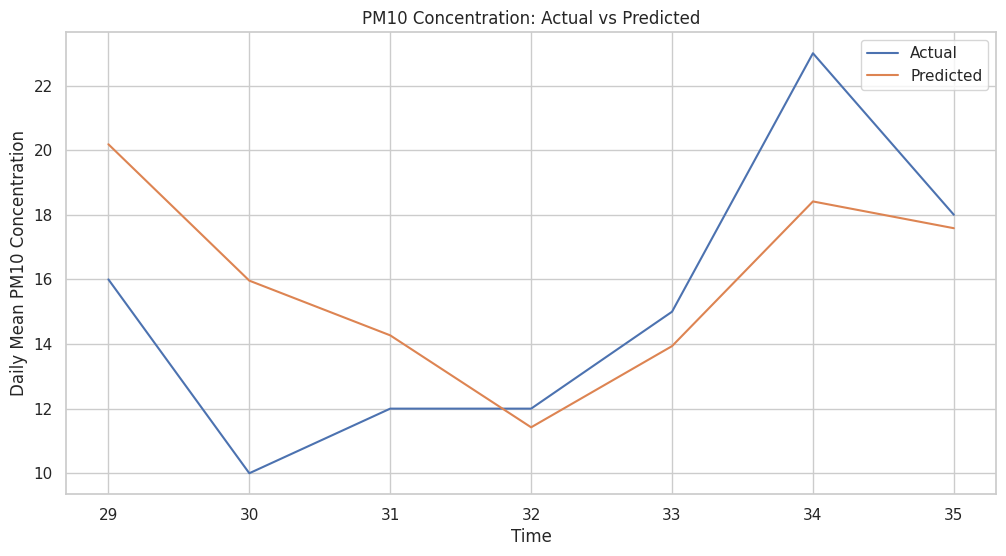

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

pm10_percentages = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 25, size=36)
})

# Calculate lagged values (previous month's concentration)
pm10_percentages['Previous Month PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].shift(1)

# Calculate seasonal indicators (month and quarter)
pm10_percentages['Month'] = pm10_percentages['Date'].dt.month
pm10_percentages['Quarter'] = pm10_percentages['Date'].dt.quarter

# Calculate trends or historical averages of concentrations
pm10_percentages['Rolling Mean PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].rolling(window=3, min_periods=1).mean()

# Drop rows with NaN resulting from rolling mean calculation
pm10_percentages.dropna(inplace=True)

# Define predictors and target for PM10
X_pm10 = pm10_percentages[['Previous Month PM10', 'Month', 'Quarter', 'Rolling Mean PM10']].values
y_pm10 = pm10_percentages['Daily Mean PM10 Concentration'].values

# Splitting data into training and validation sets (adjust as per your dataset)
train_size = int(len(X_pm10) * 0.8)  # 80-20 split
X_train_pm10, X_val_pm10 = X_pm10[:train_size], X_pm10[train_size:]
y_train_pm10, y_val_pm10 = y_pm10[:train_size], y_pm10[train_size:]

# Linear Regression model for PM10
model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Predictions on validation set
y_pred_pm10 = model_pm10.predict(X_val_pm10)

# Evaluation metrics for PM10
mse_pm10 = mean_squared_error(y_val_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_val_pm10, y_pred_pm10)

print(f"PM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10}")
print(f"Mean Absolute Error (MAE): {mae_pm10}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm10_percentages.index[train_size:], y_val_pm10, label='Actual')
plt.plot(pm10_percentages.index[train_size:], y_pred_pm10, label='Predicted')
plt.title('PM10 Concentration: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Daily Mean PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()


PM10 Validation Set Metrics:
Mean Squared Error (MSE): 8.880145489348571
Mean Absolute Error (MAE): 2.6139290439316647


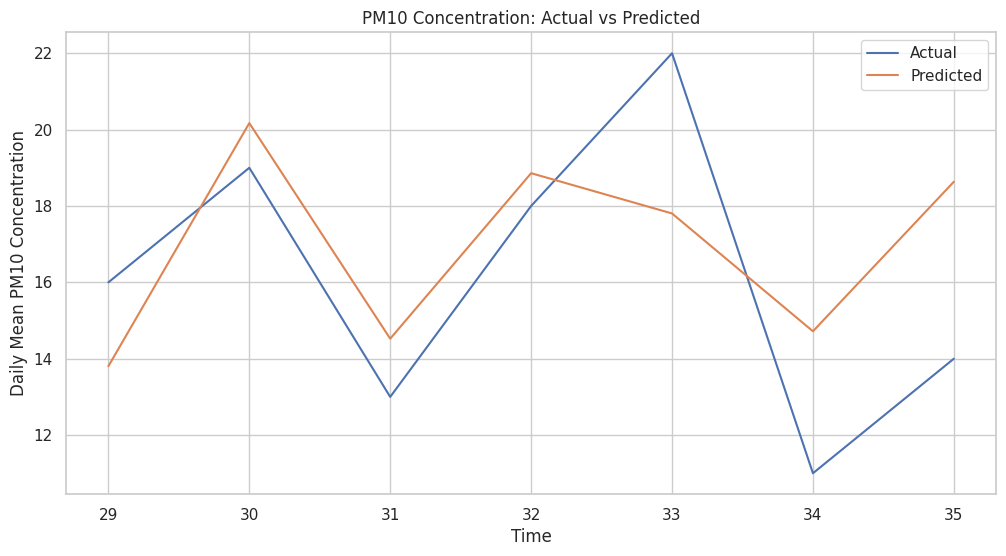

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Example data preparation for PM10 (replace with your actual data)
pm10_percentages = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=36, freq='M'),
    'Daily Mean PM10 Concentration': np.random.randint(10, 25, size=36)
})

# Calculate lagged values (previous month's concentration)
pm10_percentages['Previous Month PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].shift(1)

# Calculate seasonal indicators (month and quarter)
pm10_percentages['Month'] = pm10_percentages['Date'].dt.month
pm10_percentages['Quarter'] = pm10_percentages['Date'].dt.quarter

# Calculate trends or historical averages of concentrations
pm10_percentages['Rolling Mean PM10'] = pm10_percentages['Daily Mean PM10 Concentration'].rolling(window=3, min_periods=1).mean()

# Drop rows with NaN resulting from rolling mean calculation
pm10_percentages.dropna(inplace=True)

# Define predictors and target for PM10
X_pm10 = pm10_percentages[['Previous Month PM10', 'Month', 'Quarter', 'Rolling Mean PM10']].values
y_pm10 = pm10_percentages['Daily Mean PM10 Concentration'].values

# Splitting data into training and validation sets (adjust as per your dataset)
train_size = int(len(X_pm10) * 0.8)  # 80-20 split
X_train_pm10, X_val_pm10 = X_pm10[:train_size], X_pm10[train_size:]
y_train_pm10, y_val_pm10 = y_pm10[:train_size], y_pm10[train_size:]

# Linear Regression model for PM10
model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# Predictions on validation set
y_pred_pm10 = model_pm10.predict(X_val_pm10)

# Evaluation metrics for PM10
mse_pm10 = mean_squared_error(y_val_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_val_pm10, y_pred_pm10)

print(f"PM10 Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_pm10}")
print(f"Mean Absolute Error (MAE): {mae_pm10}")

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(pm10_percentages.index[train_size:], y_val_pm10, label='Actual')
plt.plot(pm10_percentages.index[train_size:], y_pred_pm10, label='Predicted')
plt.title('PM10 Concentration: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Daily Mean PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(pm25_2020.head)

<bound method NDFrame.head of              Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0      01/01/2020    AQS  120013012    3                             5.3   
1      01/02/2020    AQS  120013012    3                             6.6   
2      01/03/2020    AQS  120013012    3                             8.3   
3      01/04/2020    AQS  120013012    3                             5.3   
4      01/05/2020    AQS  120013012    3                             3.4   
...           ...    ...        ...  ...                             ...   
23122  12/27/2020    AQS  121290001    3                             5.7   
23123  12/28/2020    AQS  121290001    3                             6.2   
23124  12/29/2020    AQS  121290001    3                             8.5   
23125  12/30/2020    AQS  121290001    3                             7.6   
23126  12/31/2020    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Na

## Random Forest to predict PM2.5 based on PM10





In [ ]:
### transform date column into datetime
pm25_2020['Date'] = pd.to_datetime(pm25_2020['Date'], format = '%m/%d/%Y')
pm25_2020.sort_values(by='Date', inplace=True)

pm25_2022['Date'] = pd.to_datetime(pm25_2022['Date'], format = '%m/%d/%Y')
pm25_2022.sort_values(by='Date', inplace=True)

pm25_2024['Date'] = pd.to_datetime(pm25_2024['Date'], format = '%m/%d/%Y')
pm25_2024.sort_values(by='Date', inplace=True)

pm10_2020['Date'] = pd.to_datetime(pm10_2020['Date'], format = '%m/%d/%Y')
pm10_2020.sort_values(by='Date', inplace=True)

pm10_2022['Date'] = pd.to_datetime(pm10_2022['Date'], format = '%m/%d/%Y')
pm10_2022.sort_values(by='Date', inplace=True)

pm10_2024['Date'] = pd.to_datetime(pm10_2024['Date'], format = '%m/%d/%Y')
pm10_2024.sort_values(by='Date', inplace=True)

In [ ]:
print(pm25_2020.head)


<bound method NDFrame.head of             Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0     2020-01-01    AQS  120013012    3                             5.3   
20749 2020-01-01    AQS  121152002    3                            14.3   
5049  2020-01-01    AQS  120115005    3                            11.0   
5412  2020-01-01    AQS  120115005   23                             9.7   
20429 2020-01-01    AQS  121150013   23                            23.0   
...          ...    ...        ...  ...                             ...   
17658 2020-12-31    AQS  121030004    3                             7.2   
11314 2020-12-31    AQS  120570113    1                             8.5   
10948 2020-12-31    AQS  120570112    1                             8.5   
5411  2020-12-31    AQS  120115005    3                             8.2   
23126 2020-12-31    AQS  121290001    3                             7.2   

          Units  Daily AQI Value            Local Site Name  Daily Ob

In [ ]:
# Verify data types and unique values for 'Date' and 'County' columns
dtypes_pm25_2020 = pm25_2020[['Date', 'County']].dtypes
dtypes_pm10_2020 = pm10_2020[['Date', 'County']].dtypes
dtypes_pm25_2022 = pm25_2022[['Date', 'County']].dtypes
dtypes_pm10_2022 = pm10_2022[['Date', 'County']].dtypes
dtypes_pm25_2024 = pm25_2024[['Date', 'County']].dtypes
dtypes_pm10_2024 = pm10_2024[['Date', 'County']].dtypes

unique_counties_pm25_2020 = pm25_2020['County'].unique()
unique_counties_pm10_2020 = pm10_2020['County'].unique()
unique_counties_pm25_2022 = pm25_2022['County'].unique()
unique_counties_pm10_2022 = pm10_2022['County'].unique()
unique_counties_pm25_2024 = pm25_2024['County'].unique()
unique_counties_pm10_2024 = pm10_2024['County'].unique()

(dtypes_pm25_2020, dtypes_pm10_2020, dtypes_pm25_2022, dtypes_pm10_2022, dtypes_pm25_2024, dtypes_pm10_2024,
 unique_counties_pm25_2020, unique_counties_pm10_2020, unique_counties_pm25_2022, unique_counties_pm10_2022, unique_counties_pm25_2024, unique_counties_pm10_2024)


(Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 Date      datetime64[ns]
 County            object
 dtype: object,
 array(['Alachua', 'Sarasota', 'Broward', 'Citrus', 'Collier', 'Columbia',
        'Duval', 'Santa Rosa', 'Polk', 'Wakulla', 'Bay', 'Brevard',
        'Seminole', 'Volusia', 'Lee', 'Palm Beach', 'Leon', 'Nassau',
        'Holmes', 'Marion', 'Miami-Dade', 'Martin', 'Hillsborough',
        'Pinellas', 'Escambia', 'Hamilton', 'Baker'], dtype=object),
 array(['Brevard', 'Broward', 'Volusia', 'Palm Beach', 'Pinellas',
        'Seminole', 'Duval', 'Okaloosa', 'Putnam', 'Miami-Dade',
        'Hillsborough', 'Lee', 'Polk', 'Sarasota', 'Orange'], dtype=object),
 array(['Alachua', 'Santa Rosa', 

In [ ]:
# Merge all sets (pm2.5 and pm10 based on date and county)
final_df_2020 = pd.merge(pm25_2020[['Date', 'Daily Mean PM2.5 Concentration', 'County']], pm10_2020[['Date', 'Daily Mean PM10 Concentration', 'County']], on=['Date', 'County'])
final_df_2022 = pd.merge(pm25_2022[['Date', 'Daily Mean PM2.5 Concentration', 'County']], pm10_2022[['Date', 'Daily Mean PM10 Concentration', 'County']], on=['Date', 'County'])
final_df_2024 = pd.merge(pm25_2024[['Date', 'Daily Mean PM2.5 Concentration', 'County']], pm10_2024[['Date', 'Daily Mean PM10 Concentration', 'County']], on=['Date', 'County'])

final_df = pd.concat([final_df_2020, final_df_2022, final_df_2024])
final_df.sort_values(by='Date', inplace=True)

Based on the following scatter plot for the different counties there is significant correlation between PM2.5 and PM10. Therefore, based on measurements of PM 10, PM 2.5 can be estimated/predicted. This can lead to a significant reduction of costs in equipments and (....)

In [ ]:
final_df.County.unique()

array(['Sarasota', 'Hillsborough', 'Miami-Dade', 'Palm Beach', 'Lee',
       'Volusia', 'Pinellas', 'Seminole', 'Brevard', 'Broward', 'Duval',
       'Polk', 'Escambia', 'Orange', 'Martin'], dtype=object)

In [ ]:
# select county
county = 'Duval'

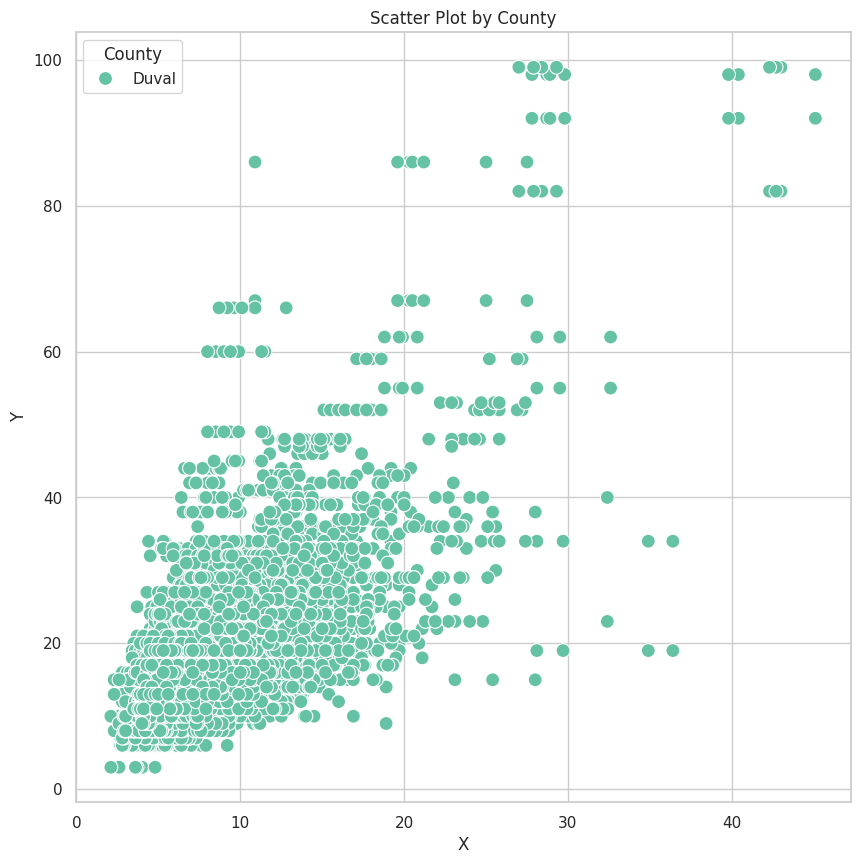

In [ ]:
df = final_df[final_df.County == county].copy()
plt.figure(figsize = (10,10))
sns.scatterplot(data=df, x = 'Daily Mean PM2.5 Concentration', y = 'Daily Mean PM10 Concentration', hue='County', palette='Set2', s=100)

plt.title('Scatter Plot by County')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='County')
plt.grid(True)
plt.show()

## data preprocessing

We apply One hot encoding to the categorical variable County

In [ ]:
final_df = pd.get_dummies(final_df, columns=['County'])

Add month of the year

In [ ]:
final_df['Month'] = final_df['Date'].dt.month

In [ ]:
final_df.columns

Index(['Date', 'Daily Mean PM2.5 Concentration',
       'Daily Mean PM10 Concentration', 'County_Brevard', 'County_Broward',
       'County_Duval', 'County_Escambia', 'County_Hillsborough', 'County_Lee',
       'County_Martin', 'County_Miami-Dade', 'County_Orange',
       'County_Palm Beach', 'County_Pinellas', 'County_Polk',
       'County_Sarasota', 'County_Seminole', 'County_Volusia', 'Month'],
      dtype='object')

Create datasets (train, validation & testing)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = final_df.columns.difference(['Date', 'Daily Mean PM2.5 Concentration'])
target = 'Daily Mean PM2.5 Concentration'

# define features and target
X = final_df[features]
y = final_df[target]

# split data (70,15,15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1904)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1904)


# normalize data based on training set distribution (mean and std)
# valor = (valor - mean) / std
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## model training

default

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=1904)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=1904)

hyperparameter tunning through grid search

In [ ]:
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


best_params = None
best_val_score = float('inf')
best_model = None

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    model = RandomForestRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        random_state=42
                    )
                    model.fit(X_train_scaled, y_train)
                    y_val_pred = model.predict(X_val_scaled)
                    val_score = mean_squared_error(y_val, y_val_pred)

                    print(f'Params: n_estimators={n_estimators}, max_depth={max_depth}, '
                          f'min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, '
                          f'max_features={max_features}, Validation MSE={val_score}')

                    if val_score < best_val_score:
                        best_val_score = val_score
                        best_params = {
                            'n_estimators': n_estimators,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features
                        }
                        best_model = model

print(f'Best Hyperparameters: {best_params}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.655425656206374
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.707945750998549
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.707945750998549


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.668264673809824
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.721065265912793
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.721065265912793


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.744451316154271
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.75656515867326
Params: n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.75656515867326


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.648123398034013
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.724820728077443
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.724820728077443


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.666587787715271
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.713963376294174
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.713963376294174


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.744451316154271
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.75656515867326
Params: n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.75656515867326


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.689464814983271
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.711714161709
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.711714161709


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.700792011273025
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.757977402379099
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.757977402379099


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.750433224504122
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.784813582480277
Params: n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.784813582480277


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.2793802031061805
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.252206310194377
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.252206310194377


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.345466061583424
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.2950928410845375
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.2950928410845375


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.436216075310484
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.379113780782088
Params: n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.379113780782088


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.282947894080507
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.269328926013573
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.269328926013573


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.343791889147629
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.296796264020659
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.296796264020659


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.436216075310484
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.379113780782088
Params: n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.379113780782088


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.334056286690042
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.301948571912039
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.301948571912039


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.375787994068056
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.322595771100703
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.322595771100703


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.445650249536299
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.387573748609591
Params: n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.387573748609591


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.292734858584
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.279411356606959
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.279411356606959


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.35919515644734
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.302158063202721
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.302158063202721


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.370257026068161
Params: n_estimators=50, max_depth=30, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.370257026068161


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.301124862891726
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.287762376628433
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.287762376628433


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.353924721105333
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.305775507147224
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.305775507147224


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.370257026068161
Params: n_estimators=50, max_depth=30, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.370257026068161


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.342259098601038
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.326510893032668
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.326510893032668


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.382560442400438
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.326931585163614
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.326931585163614


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.45034595775453
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374756413862732
Params: n_estimators=50, max_depth=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.374756413862732


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.292734858584
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.2799821772989555
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.2799821772989555


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.35919515644734
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.3021545576482
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.3021545576482


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.3750076055130025
Params: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.3750076055130025


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.301124862891726
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.286647978899665
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.286647978899665


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.353924721105333
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.304075187018015
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.304075187018015


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.440450527366899
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.3750076055130025
Params: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.3750076055130025


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.342259098601038
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.330751084735669
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.330751084735669


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.382560442400438
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.324282844363596
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.324282844363596


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.45034595775453
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.374756413862732
Params: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.374756413862732


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.633322149472206
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.683013433828829
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.683013433828829


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.6574078051157874
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.69084514051175
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.69084514051175


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.736279862588467
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.74073002526105
Params: n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.74073002526105


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.631398468598006
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.695755379178124
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.695755379178124


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.657490295380253
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.697376363341712
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.697376363341712


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.736279862588467
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.74073002526105
Params: n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.74073002526105


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.66825839259051
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.696492379845101
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.696492379845101


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.688186213093413
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.724242071369199
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.724242071369199


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.742949711470516
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.75760040260867
Params: n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.75760040260867


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.275916852108192
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.243645909241858
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.243645909241858


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, Validation MSE=4.333166162502192
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.2896247335875755
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features=log2, Validation MSE=4.2896247335875755


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=auto, Validation MSE=4.428806210929314
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.366103041310693
Params: n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=4, max_features=log2, Validation MSE=4.366103041310693


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=auto, Validation MSE=4.277927493178345
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.252558019944135
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features=log2, Validation MSE=4.252558019944135


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=auto, Validation MSE=4.331784521434838
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.292725292266251
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features=log2, Validation MSE=4.292725292266251


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=auto, Validation MSE=4.428806210929314
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.366103041310693
Params: n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=4, max_features=log2, Validation MSE=4.366103041310693


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=auto, Validation MSE=4.320512141414484
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.294539783168086
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features=log2, Validation MSE=4.294539783168086


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, Validation MSE=4.364416432760425
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, Validation MSE=4.318149725446824
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features=log2, Validation MSE=4.318149725446824


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=auto, Validation MSE=4.438980579980897
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, Validation MSE=4.371877427489838
Params: n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features=log2, Validation MSE=4.371877427489838


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, Validation MSE=4.290556244829059
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, Validation MSE=4.274031171937518
Params: n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, Validation MSE=4.274031171937518


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



## evaluate final model


In [ ]:
y_val_pred = model.predict(X_val_scaled)

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation MSE: {val_mse}, Validation R2: {val_r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning:

invalid value encountered in divide



ValueError: Input contains NaN.

## test model

In [ ]:
def get_prediction(model, X, scaler):
    X_scaled = scaler.transform(X)
    return model.predict(X_scaled)

In [ ]:
y_test_pred = model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}, Test R2: {test_r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning:

invalid value encountered in divide



ValueError: Input contains NaN.

Visualise results (predicted x ground truth)

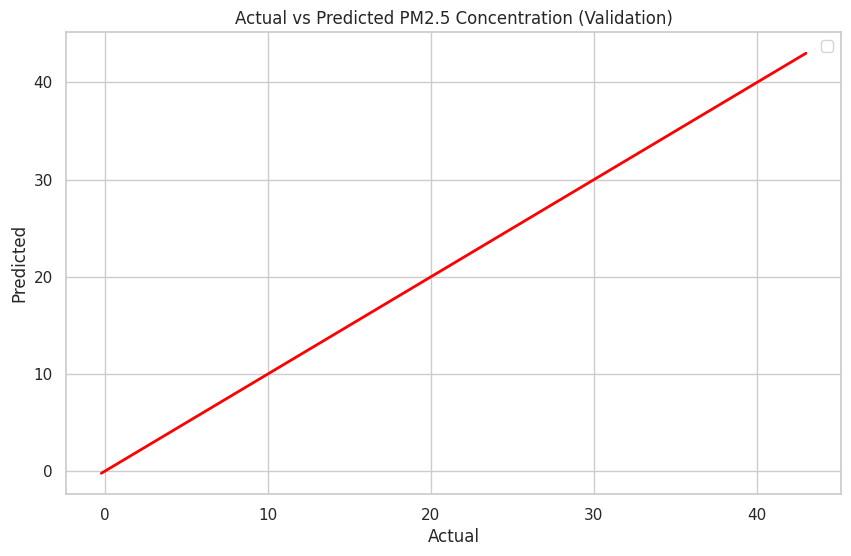

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, label='Validation')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
plt.title('Actual vs Predicted PM2.5 Concentration (Validation)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

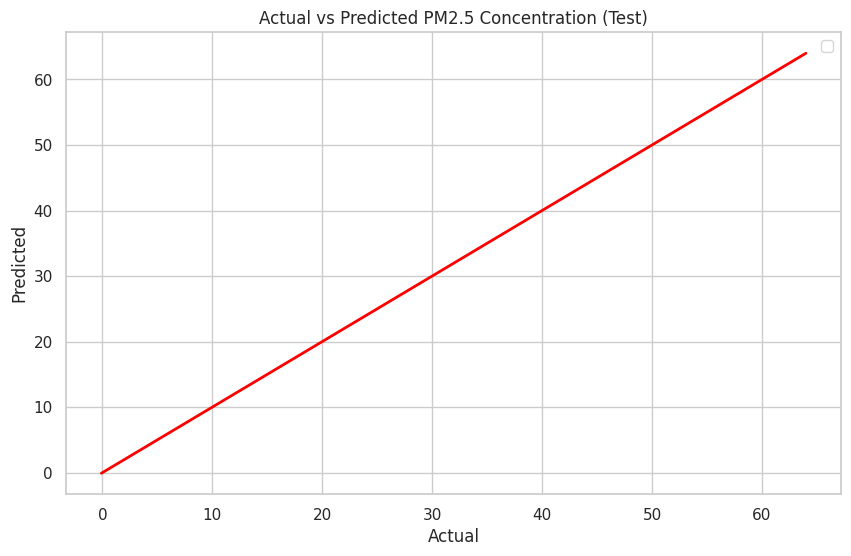

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted PM2.5 Concentration (Test)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()